In [182]:
import pandas as pd
import seaborn as sb
import numpy as np
df = pd.read_csv(r'E:\cms-downloader\cms_downloads\Spring 2023\Big Data and NoSQL\week 2023-5-25\egphotelbookings.csv')
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,JW Marriott Hotel,0,23,2017,August,35,30,2,5,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,119386,JW Marriott Hotel,0,102,2017,August,35,31,2,5,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,119387,JW Marriott Hotel,0,34,2017,August,35,31,2,5,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,119388,JW Marriott Hotel,0,109,2017,August,35,31,2,5,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


In [183]:
# check null values at each column
df.isna().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company has 112593 null values so we can't fill it, drop it.
we don't need babies column so drop this column.
Unnamed: 0 is just the id drop it.
arrival_date_week_number: we will not use arrival_date_week_number so drop it.

In [184]:
# drop company,babies and Unnamed column
df.drop(['company', 'babies', 'Unnamed: 0', 'arrival_date_week_number'], axis=1, inplace=True)


drop null values in the country and children. 

In [185]:
df.dropna(subset=['country', 'children'], inplace=True)

In [186]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                               0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In [187]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
meal                                 5
country                            177
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              332
days_in_waiting_list               128
customer_type                        4
adr                               8870
required_car_parking_spaces          5
total_of_special_requests

get insights about the values inside each column

In [188]:
for col in df.columns:
    if(df[col].nunique() < 10):
        print(col)
        print(df[col].value_counts())
        print()

hotel
JW Marriott Hotel    79302
Renaissance Hotel    39596
Name: hotel, dtype: int64

is_canceled
0    74745
1    44153
Name: is_canceled, dtype: int64

arrival_date_year
2019    56435
2017    40604
2018    21859
Name: arrival_date_year, dtype: int64

children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: children, dtype: int64

meal
BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

is_repeated_guest
0    115092
1      3806
Name: is_repeated_guest, dtype: int64

deposit_type
No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

customer_type
Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

required_

The frequency of each column looks normal to us.

Detect the outliers and remove them using boxplots. : lead time, agent, days_in_waiting_list, adr


<AxesSubplot: >

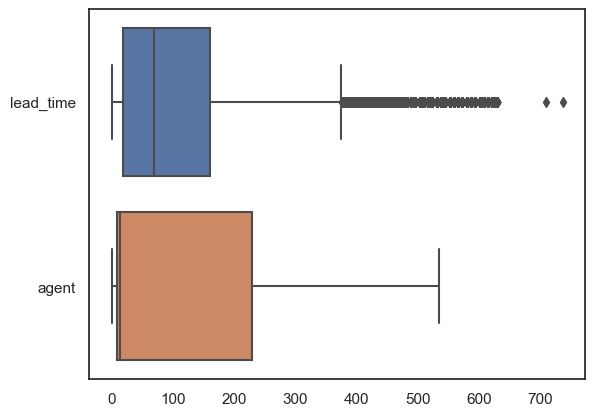

In [189]:
sb.boxplot(data=df[['lead_time','agent']], orient='h')

In [190]:
def remove_outliers(df, col_name):
    # remove outliers in lead_time
    Q1 = np.percentile(df[col_name], 25, method='midpoint')
    Q3 = np.percentile(df[col_name], 75, method='midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR

    #Below Lower bound
    lower=Q1-1.5*IQR
    df = df[((df[col_name]>=lower) & (df[col_name] <= upper))]
    return df

def boxplot(df, col_name):
    sb.boxplot( data = df[col_name], orient="h")

In [191]:
df = remove_outliers(df, 'lead_time')

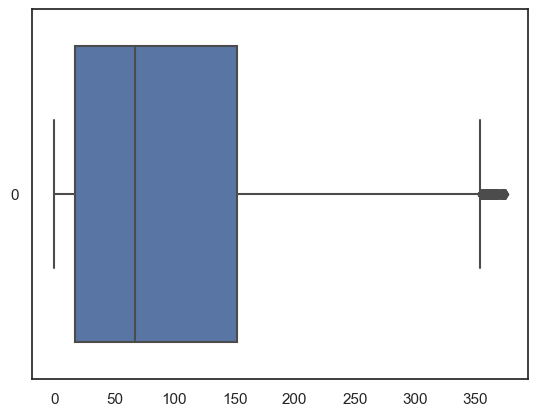

In [192]:
boxplot(df,'lead_time')

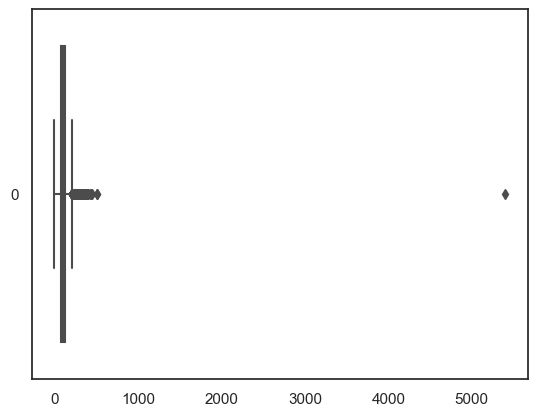

In [193]:
boxplot(df,'adr')

In [194]:
df = remove_outliers(df, 'adr')

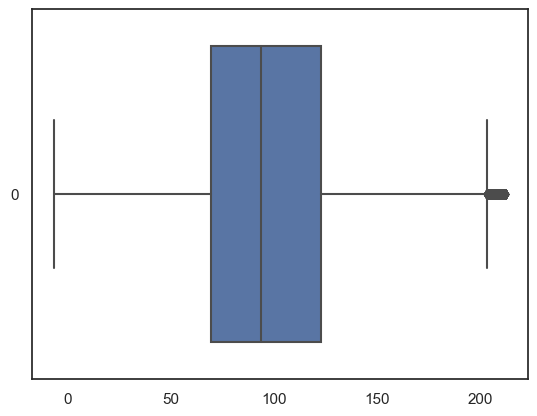

In [195]:
boxplot(df, 'adr')

In [196]:
for col in categorical_columns:
    print(col, df[col].unique(),'\n')

hotel ['Renaissance Hotel' 'JW Marriott Hotel'] 

arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 

meal ['BB' 'FB' 'HB' 'SC' 'Undefined'] 

country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'UKR' 'SMR'
 'LVA' 'PRI' 'SRB' 'IND' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'LBN' 'PHL' 'SYC' 'AZE' 'BHR' 'NZL' 'KAZ'
 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH' 'MUS' 'COM'
 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM' 'PLW' 'QAT'
 'EGY' 'MLT' 'MWI' 'ECU' 'MDG' 'IDN' 'ISL' 'UZB' 'NPL' 'BHS' 'PAK' 'MAC'
 'TGO' 'TWN' 'STP' 'SEN' 'PER' 'KNA' '

In [197]:
# encode the categorical values


C:\Users\saryn\AppData\Local\Temp\ipykernel_9236\912234535.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

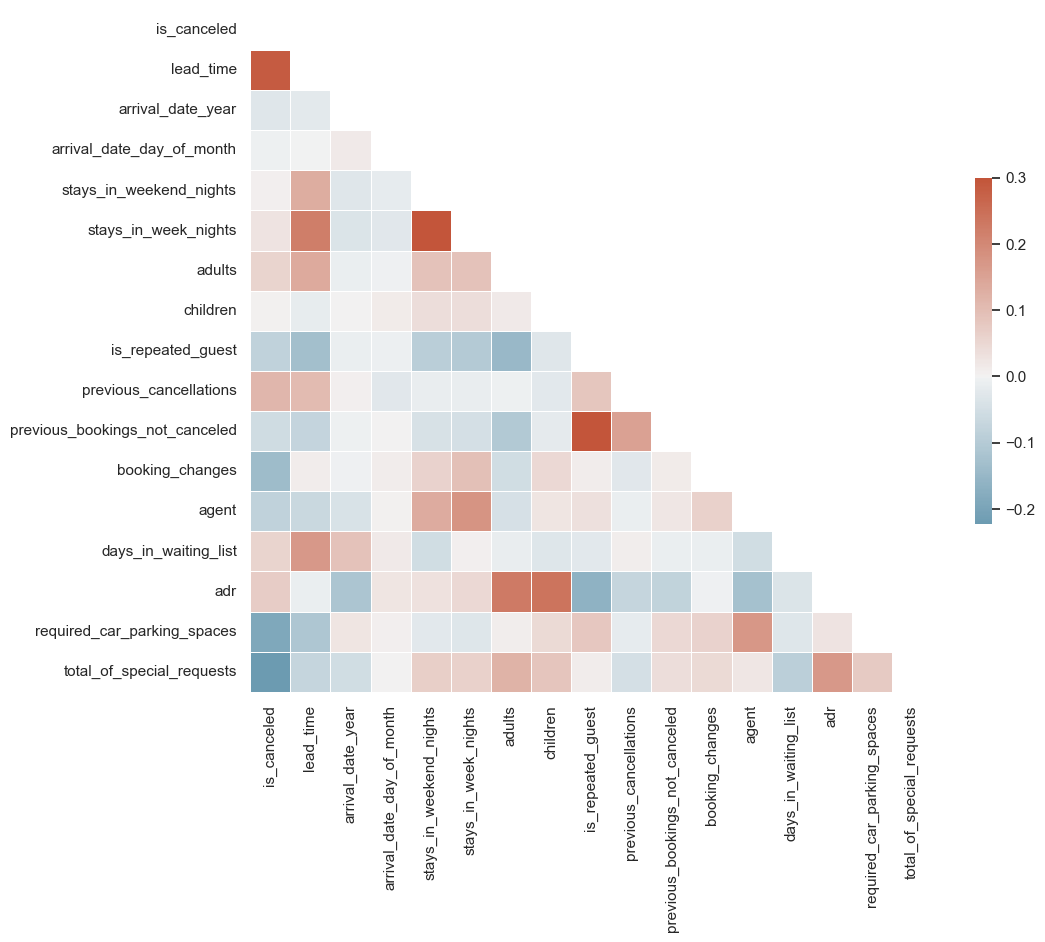

In [198]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

People who get children with them are more profitable to the hotel as there is a correlation between children and adr.

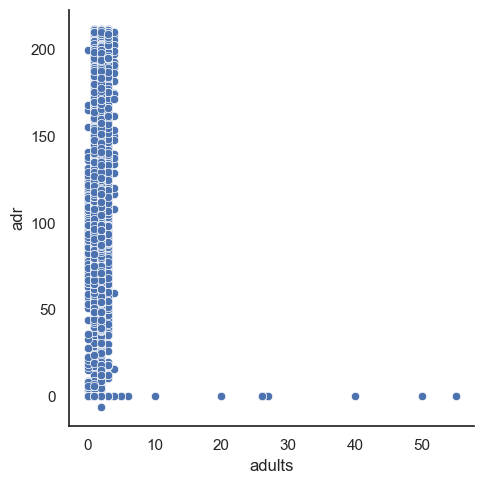

In [200]:
sns.relplot(data=df, x='adults', y='adr')

Check the relation between the lead_time and is_cancelled.

In [ ]:
sns.histplot(data=df[(df['is_canceled'] == 0)], x='lead_time', bins=20)

We see from the histogram of the non-cancelled reservations: lead_time is shifted towards left or small number of days,
so : people don't tend to cancel when they reserved in date closer to the check in.

In [ ]:
sns.histplot(data=df[(df['is_canceled'] == 1)], x='lead_time', bins=20)

We don't have a pattern for the cancelled booking.